In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# check whether GPU is provided
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14654, done.
remote: Total 14654 (delta 0), reused 0 (delta 0), pack-reused 14654
Receiving objects: 100% (14654/14654), 13.22 MiB | 24.74 MiB/s, done.
Resolving deltas: 100% (9971/9971), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [ ]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

# Before we starting to test we must copy yolov4.data as coco.data

In [ ]:
%cp "/content/drive/MyDrive/Deep_learning_projeleri/yolov4_rcplane/data/yolov4.data" "/content/drive/MyDrive/Deep_learning_projeleri/yolov4_rcplane/data/coco.data"

# Testing our weights on an image

In [ ]:
!./darknet detector test "/content/drive/MyDrive/Deep_learning_projeleri/yolov4_rcplane/data/coco.data" "/content/drive/MyDrive/Deep_learning_projeleri/yolov4_rcplane/data/yolov4_custom_test.cfg" "/content/drive/MyDrive/Deep_learning_projeleri/yolov4_rcplane/backup/yolov4_custom_train_last.weights" "/content/drive/MyDrive/Deep_learning_projeleri/yolov4_rcplane/example/img1.jpg" -thresh 0.35

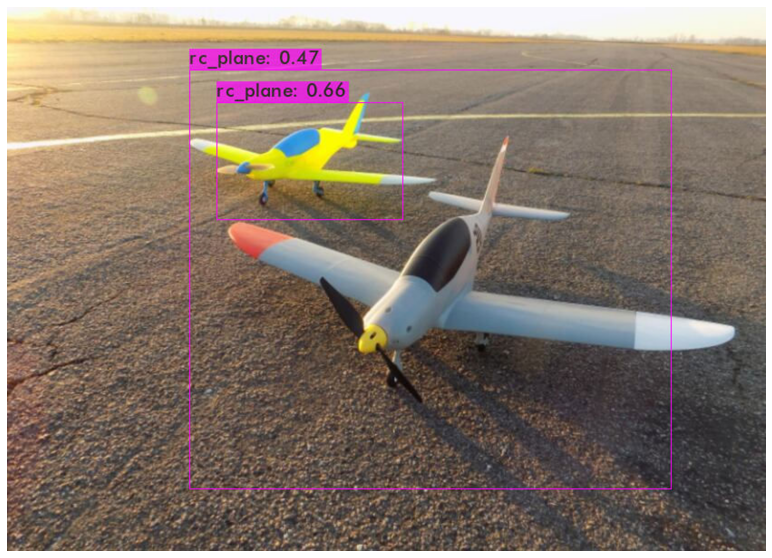

In [ ]:
imShow('predictions.jpg')

# Testing our weights on a video

In [ ]:
!./darknet detector demo "/content/drive/MyDrive/Deep_learning_projeleri/yolov4_rcplane/data/coco.data" "/content/drive/MyDrive/Deep_learning_projeleri/yolov4_rcplane/data/yolov4_custom_test.cfg" "/content/drive/MyDrive/Deep_learning_projeleri/yolov4_rcplane/backup/yolov4_custom_train_last.weights" -dont_show "/content/drive/MyDrive/Deep_learning_projeleri/yolov4_rcplane/example/test2.mp4" -i 0 -out_filename results.avi

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Demo
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  

In [ ]:
download('results.avi')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Output coordinates of objects: 
darknet.exe detector test cfg/coco.data yolov4.cfg yolov4.weights -ext_output dog.jpg



In [ ]:
predict = !./darknet detector test "/content/drive/MyDrive/Deep_learning_projeleri/yolov4_rcplane/data/coco.data" "/content/drive/MyDrive/Deep_learning_projeleri/yolov4_rcplane/data/yolov4_custom_test.cfg" "/content/drive/MyDrive/Deep_learning_projeleri/yolov4_rcplane/backup/yolov4_custom_train_last.weights" "/content/drive/MyDrive/Deep_learning_projeleri/yolov4_rcplane/example/img1.jpg" -ext_output -thresh 0.35

In [ ]:
coordinates = predict[185:len(predict)-3]
coor = []
for i in coordinates:
  i = i.split(')') # I split the output in there cause of, there is no space between height and ')'
  coor.append([int(s) for s in i[0].split() if s.isdigit()])
  
coor

[[202, 69, 530, 462], [232, 105, 204, 129]]

# Pointing RC planes mid point

In [ ]:
import cv2
import matplotlib.pyplot as plt

def pointing(coor):

  #img[100:200, (i[0]+(i[2]/4)):(i[0]+(i[2]/4*3))] = [100,150,0]
  x1 = int(coor[0]+(coor[2]/4)+(coor[2]/8))
  x2 = int(coor[0]+(coor[2]/4*3)-(coor[2]/8))
  y2 = int(coor[1]+(coor[3]/4*3)-(coor[3]/8))
  y1 = int(coor[1]+(coor[3]/4)+(coor[3]/8))
  #print(x1,x2,y1,y2)
  return (x1,x2,y1,y2)

def midpoint(coor):
  x = int(coor[0]+(coor[2]/2))
  y = int(coor[1]+(coor[3]/2))
  #print(x1,x2,y1,y2)
  return (x,y)

# Painting mid point of the img

In [ ]:
midpoint(coor[0])#x, y

(467, 300)

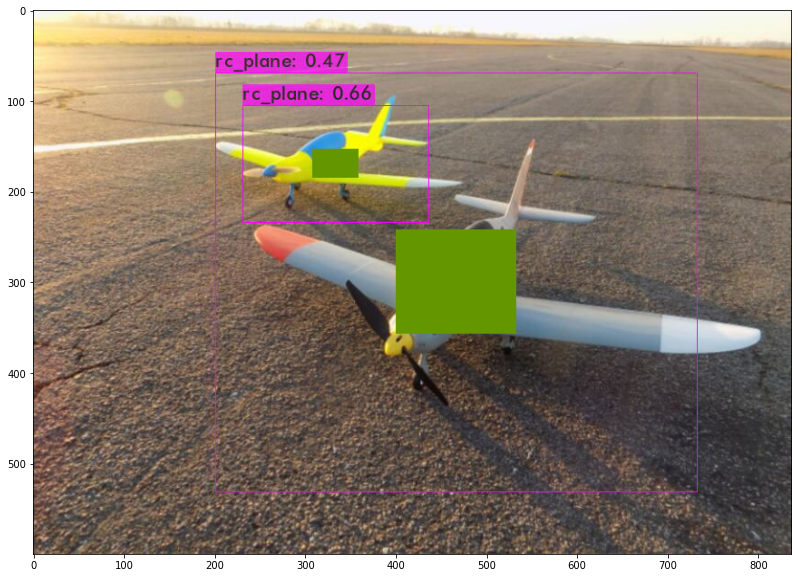

In [ ]:
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize = (15,10))
img_path = cv2.imread('predictions.jpg')
img = cv2.cvtColor(img_path, cv2.COLOR_BGR2RGB)

for i in coor:
  x1, x2, y1, y2 = pointing(i)
  img[int(y1):int(y2), int(x1):int(x2)] = [100,150,0]

plt.imshow(img)

# For now I can't painting the midpoint of the video